# Steps to create train and validation dataset from ImageClef

In [68]:
from pathlib import Path
from shutil import copytree, move
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
CLEF = Path('/home/jtrell2/workspace/microscopy_classification/data/imageclef_2016/train')
OUTPUT = Path('/home/jtrell2/workspace/microscopy_classification/data/clef_2016_DM')
CLASSES = ['DMEL', 'DMFL', 'DMLI', 'DMTR']

In [55]:
OUTPUT.mkdir(exist_ok=True)
(OUTPUT / 'train').mkdir(exist_ok=True)
(OUTPUT / 'validation').mkdir(exist_ok=True)
(OUTPUT / 'test').mkdir(exist_ok=True)

In [56]:
for c in CLASSES:
    source = CLEF / c
    dest = OUTPUT / 'train' / c
    copytree(source, dest)

In [72]:
paths = [OUTPUT / 'train' / c for c in CLASSES]
y = [len(listdir(c)) for c in paths]
y

[188, 816, 627, 270]

<BarContainer object of 4 artists>

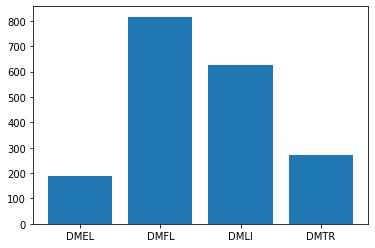

In [73]:
plt.bar(CLASSES, y)

In [61]:
val_y = [n // 10 for n in y]
val_y

[20, 90, 69, 30]

In [62]:
import random
seed = 50
random.seed(seed)
data = [listdir(CLEF / c) for c in CLASSES]

In [63]:
for d in data:
    random.shuffle(d)

In [64]:
val_data = [data[i][0:val_y[i]] for i in range(len(CLASSES))]
train_data = [data[i][val_y[i]:] for i in range(len(CLASSES))]

In [70]:
for i in range(len(val_data)):
    (OUTPUT / 'validation' / CLASSES[i]).mkdir(exist_ok=True)
    for img in val_data[i]:
        source = OUTPUT / 'train' / CLASSES[i] / img
        dest = OUTPUT / 'validation' / CLASSES[i] / img
        move(source, dest)

<BarContainer object of 4 artists>

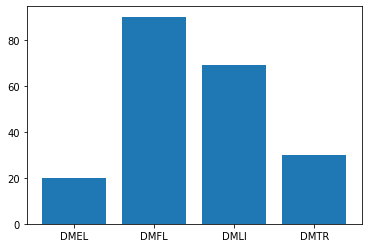

In [71]:
paths_val = [OUTPUT / 'validation' / c for c in CLASSES]
y_val = [len(listdir(c)) for c in paths_val]
plt.bar(CLASSES, y_val)